# 8장 : 딥러닝
딥러닝은 층을 깊게 한 신경망 학습을 의미한다(심층 학습). 심층 신경망은 지금까지 설명한 신경망을 바타응로 뒷단에 층을 추가하기만 하면 만들 수 있지만, 커다란 문제가 몇 개 있다. 이번 장에서는 딥러닝의 특징과 과제, 그리고 가능성을 살펴보도록 하자. 또 오늘날의 첨단 딥러닝에 대한 설명도 준비하였다.

## 8.1 더 깊게
신경망에 관해 그동안 많은 것을 배웠다. 신경망을 구성하는 다양한 계층과 학습에 효과적인 기술, 영상 분야에 특히 유효한 CNN과 매개변수 최적화 기법 등이 떠오를 것이다. 이 모두가 딥러닝에 중요한 기술이다. 이번 절에서는 그동안 배운 기술을 집약하고 심층 신경망을 만들어 MNIST 데이터셋의 손글씨 숫자 인식에 도전하려 한다.       

### 8.1.1 더 깊은 신경망으로
거두절미하고, 이번 절에서는 [그림8-1]과 같이 구성된 CNN을 만들어보고자 한다(이 신경망은 다음 절에서 설명하는 VGG 신경망을 참고하였다).      

#### [그림8-1] 손글씨 숫자를 인식하는 심층 CNN

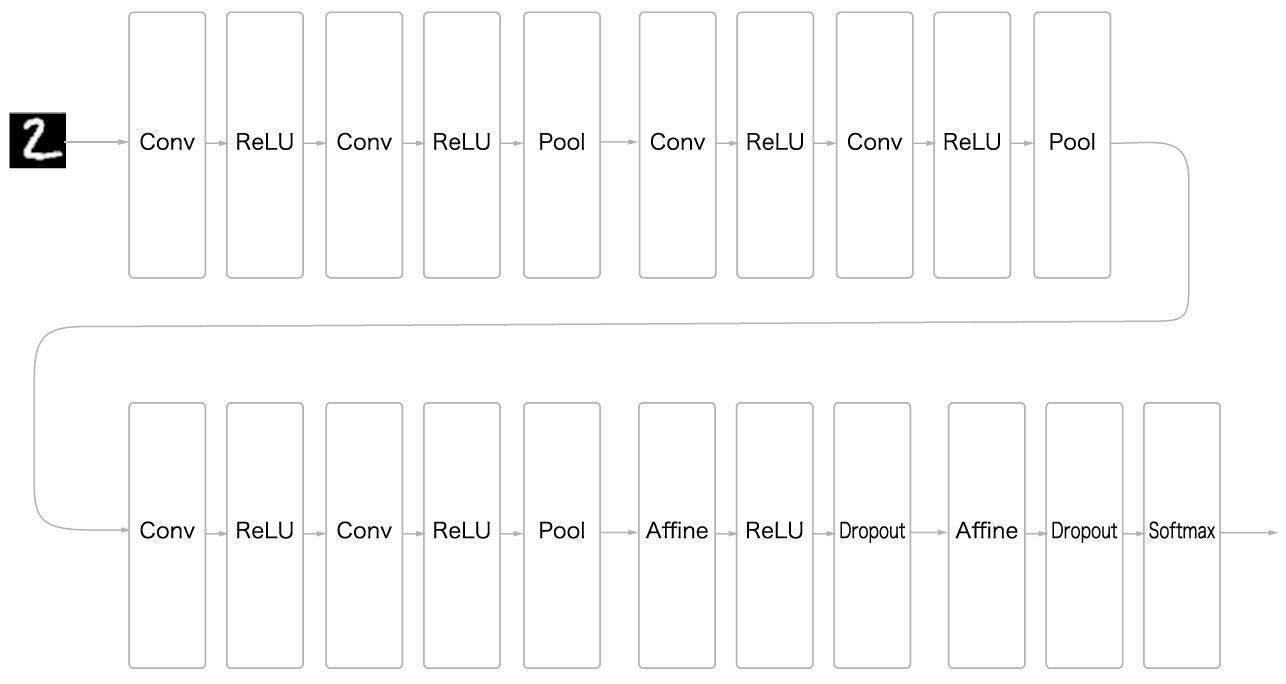

In [3]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-1.png")

척 보아도 지금까지 구현한 신경망보다 층이 깊어 보인다. 여기에서 사용하는 합성곱 계층은 모두 $3 \times 3$ 크기의 작은 필터로, 층이 깊어지면서 채널 수가 더 늘어나는 것이 특징이다(합성곱 계층의 채널 수는 앞 계층에서부터 순서대로 16, 16, 32, 32, 64, 64로 늘어난다). 또 그림과 같이 풀링 계층을 추가하여 중간 데이터의 공간 크기를 점차 줄여간다. 그리고 마지막 단의 완전연결 계층에서는 드롭아웃 계층을 사용한다.     

가중치 초깃값으로는 He 초깃값을 사용하고, 가중치 매개변수 갱신에는 Adam을 이용한다. 이상을 정리하면 이 신경망의 특징은 다음과 같다.     
- $3 \times 3$의 작은 필터를 사용한 합성곱 계층
- 활성화 함수는 ReLU
- 완전연결 계층 뒤에 드롭아웃 계층 사용
- Adam을 사용하여 최적화
- 가중치 초깃값은 'He의 초깃값'

이상의 특징에서 보듯 이 신경망에는 그동안 배운 신경망 기술을 잔뜩 녹여놓았다. 그럼 이 신경망을 학습시켜보자. 

```python
calculating test accuracy ...
test accuracy:0.9935
```

이 신경망의 정확도는 99.35%정도가 된다. 이 정도면 매우 훌륭한 성능이라고 할 수 있다. 반대로 이 신경망이 잘못 인식할 확률은 겨우 0.65%이다. 그럼 실제로 어떤 이미지를 인식하지 못했는지 살펴보자. [그림8-2]는 인식에 실패한 예이다.      

#### [그림8-2] 인식하지 못한 이미지들 : 각 사진의 왼쪽 위는 정답 레이블, 오른쪽 아래는 이 신경망의 추론 결과

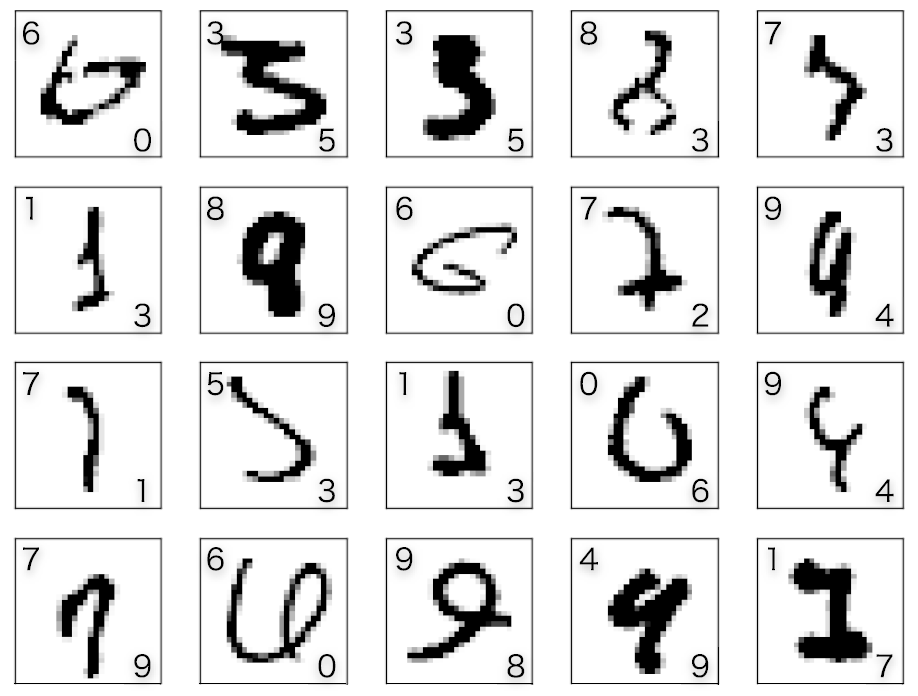

In [4]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-2.png")

[그림8-2]의 사진들은 우리 인간도 판단하기 어려운 이미지이다. 실제로 우리도 똑같이 '인식 오류'를 저지르는 이미지가 여럿 포함되어 있다. 첫 번째 이미지는 '0'처럼 보이고 (정답은 6), 두 번째 이미지는 분명히 '5'처럼 보이기도 한다(정답은 '3'). 전체적으로 '1'과 '7', '0'과 '6', '3'과 '5'의 조합이 헷갈리는데, 이런 예를 보자면 인식을 못한 것도 이해가 된다.     

이번의 심층 CNN은 정확도가 높고, 잘못 인식한 이미지들도 인간과 비슷한 인식 오류를 저지르고 있다. 이런 점에서도 심층 CNN의 잠재력이 크다는 걸 새삼 느낄 수 있을 것이다.

### 8.1.2 정확도를 더 높이려면
$\text{<What is the class of this image?>}$ 웹 사이트는 다양한 데이터셋을 대상으로 그동안 논문 드에서 발표한 기법들의 정확도 순위를 정리해두었다(그림 8-3).     

#### [그림8-3] MNIST 데이터셋에 대한 각 기법의 순위(2016년 12월 시점)

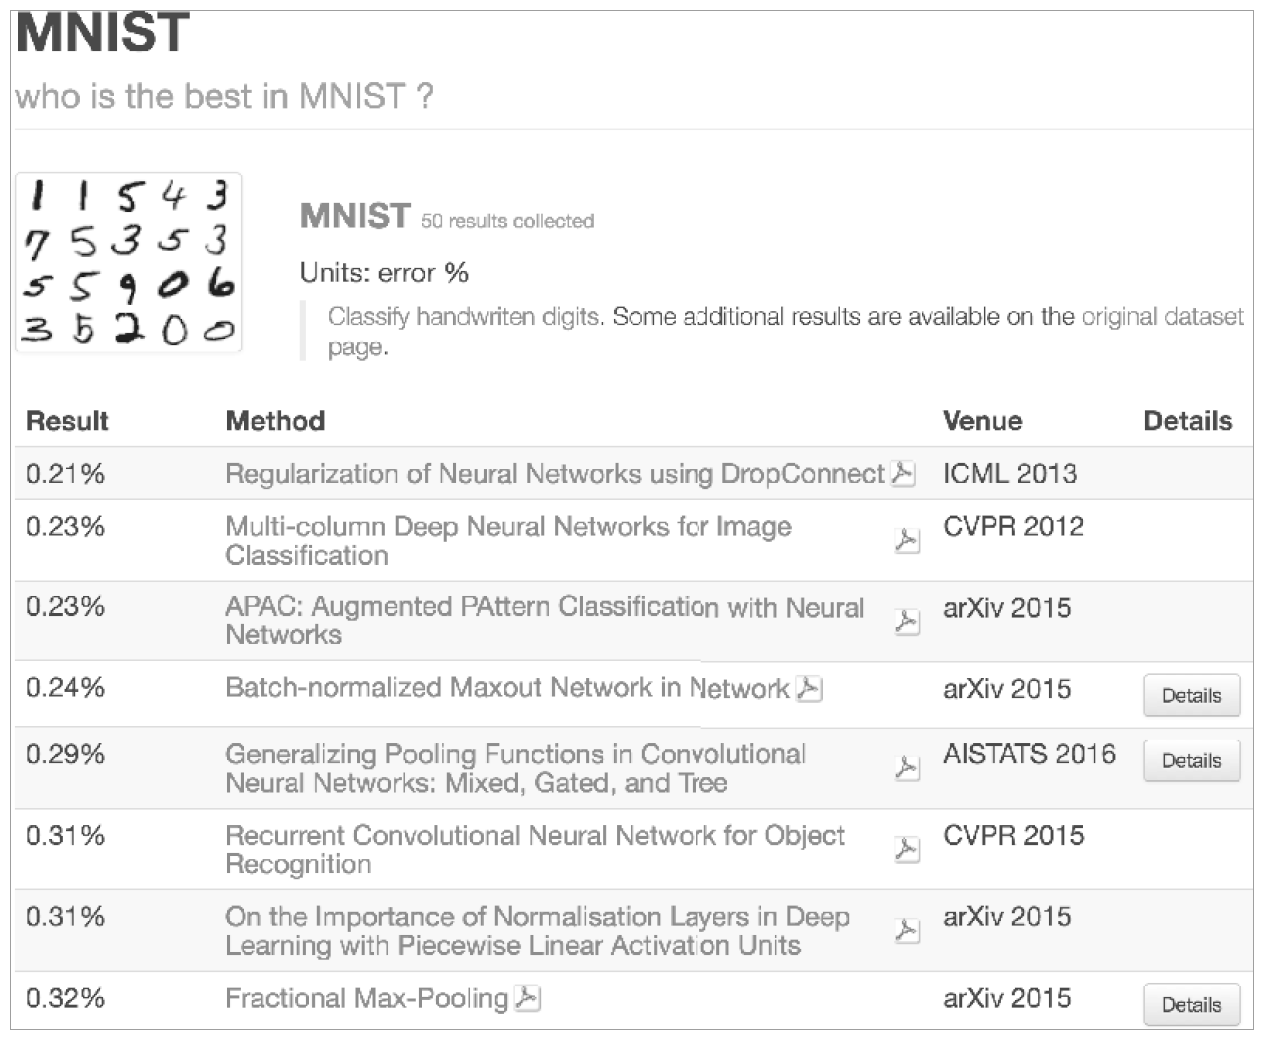

In [2]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-3.png")

[그림8-3]의 순위를 보면 'Neural Networks'나 'Deep', 'Convolutional'이라는 키워드가 돋보인다. 사실 상위권은 대부분 CNN을 기초로 한 기법들이 점령하였다. 참고로 2016년 10월 기준 MNIST 데이터셋 에 대한 정확도 1위는 99.79%(오류율 0.21%)이며, 이 기법도 CNN을 기초로 한다. 다만 이 목록의 기법들이 사용하는 CNN들은 그다지 깊지 않다(합성곱 계층 2개에 완전연결 계층 2개 정도인 신경망)      

$\textbf{NOTE}$     
> MNIST 데이터셋에 대해서는 층을 아주 깊게 하지 않고도 (현시점에서는) 최고 수준의 결과가 나온다. 이는 손글씨 숫자라는 문제가 비교적 단순해서 신경망의 표현력을 극한까지 높일 필요가 없기 때문이다. 그래서 층을 깊게 해도 혜택이 적다고 할 수 있다. 반면, 나중에 소개하는 대규모 일반 사물 인식에서는 문제가 훨씬 복잡해지므로 층을 깊게 하면 정확도를 크게 끌어올릴 수 있게 된다.

[그림8-3]의 상위 기법들을 참고하면 정확도를 더 높일 수 있는 기술이나 힌트를 발견할 수 있다. 예를 들어 앙상블 학습, 학습률 감소, 데이터 증강 등이 정확도 향상에 공헌함을 확인할 수 있다. 특히 데이터 증강은 손쉬운 방법이면서도 정확도 개선에 아주 효과적이다.       

$\small \textbf{데이터 증강}^{\text{data augmentation}}$은 입력 이미지(훈련 이미지)를 알고리즘을 동원하여 '인위적'으로 확장한다. [그림8-4]와 같이 입력 이미지를 회전하거나 세로로 이동하는 등 미세한 변화를 주어 이미지의 개수를 늘리는 것이다. 이는 데이터가 몇 개 없을 때 특히 효과적인 수단이다.     

#### [그림8-4] 데이터 확장의 예

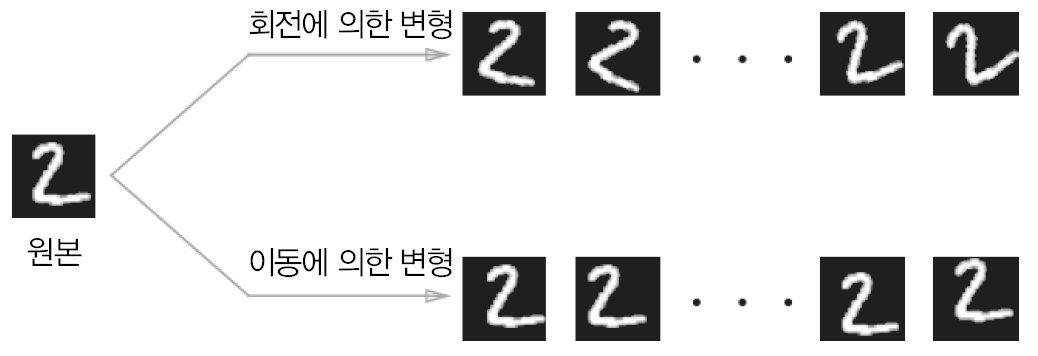

In [4]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-4.png")

데이터 증강은 [그림8-4] 같은 변형 외에도 다양한 방법으로 이미지를 확장할 수 있다. 예를 들어 이미지 일부를 잘라내는 $\small \textbf{crop}$이나 좌우를 뒤집는 $\small \textbf{flip}$등이 있다. 일반적인 이미지에는 밝기 등의 외형 변화나 확대 $\cdot$ 축소 등의 스케일 변화도 효과적이다. 어쨌든 데이터 증강을 동원하여 훈련 이미지의 개수를 늘릴 수 있다면 딥러닝의 인식 수준을 개선할 수 있다. 이것은 쉬운 '트릭'이라 가볍게 생각할지도 모르지만, 멋진 결과를 가져오는 경우가 많다. 이 책에서는 데이터 증강은 구현하지 않으나, 보다시피 어렵지 않으니 흥미가 있다면 도전해보자.

### 8.1.3 깊게 하는 이유
'층을 깊게 하는 것'이 왜 중요한가에 대한 이론적인 근거는 아직 많이 부족한 것이 사실이다. 그래도 지금까지의 연구와 실험 결과를 바탕으로 설명할 수 있는 것은 몇 가지 있다(다소 직관적이기는 하지만). 이번 절에서는 '$\small \textbf{층을 깊게 하는 것의 중요성}$'에 대해서, 이를 뒷받침하는 데이터와 설명을 몇 가지 소개한다.     

우선 층을 깊게 하는 것의 중요성은 ILSVRC로 대표되는 대규모 이미지 인식 대회의 결과에서 파악할 수 있다(자세한 내용은 다음 절을 참고하자). 이 대회에서 상위권을 차지했던 기법 대부분은 딥러닝 기반이며, 그 경향은 신경망을 더 깊게 만드는 방향으로 가고 있다. 층의 깊이에 비례해 정확도가 좋아지는 것이다.        

이어서 층을 깊게 할 때의 이점을 설명하고자 한다. 그 이점 하나는 신경망의 매개변수 수가 줄어든다는 것이다(?). 층을 깊게 한 신경망은 깊지 않은 경우보다 적은 매개변수로 같은 (혹은 그 이상) 수준의 표현력을 달성할 수 있다. 합성곱 연산에서의 필터 크기에 주목해 생각해 보면 쉽게 이해될 것이다. 예를 하나 보자. [그림8-5]는 $5 \times 5$필터로 구성된 합성곱 계층이다.       

#### [그림8-5] $5 \times 5$ 합성곱 연산의 예

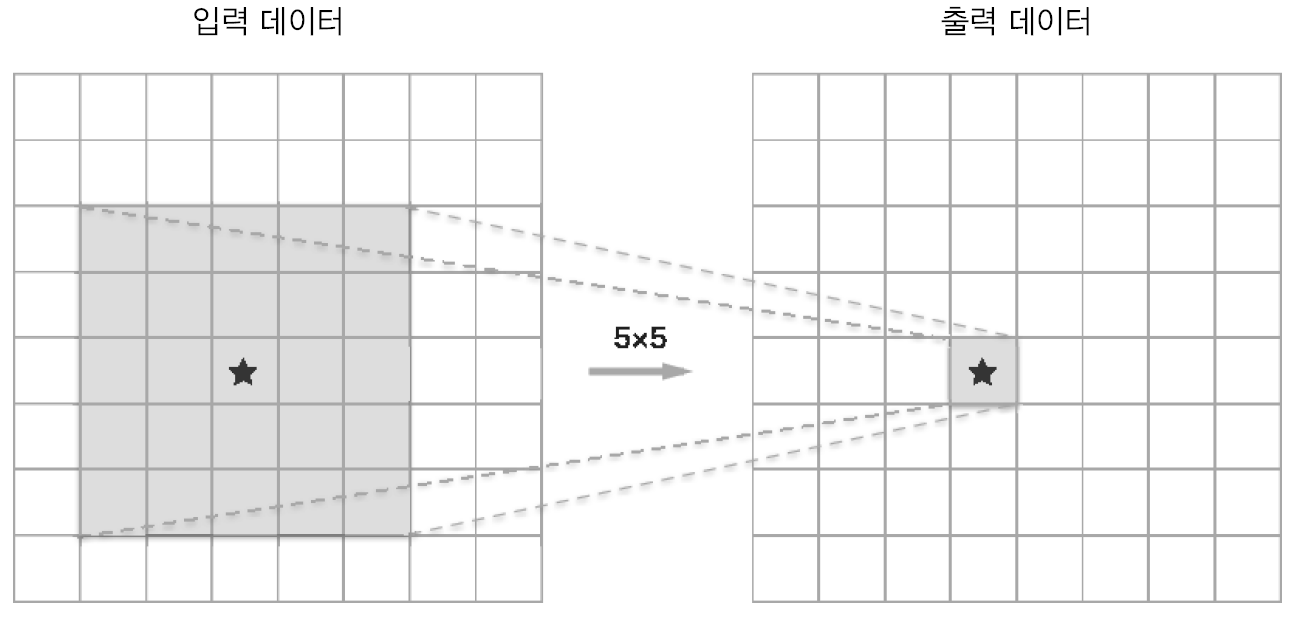

In [5]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-5.png")

여기에서 주목할 점은 출력 데ㅣ터의 각 노드가 입력 데이터의 어느 영역으로부터 계산되었느냐는 것이다. 당연하지만 [그림8-5]의 예에서는 각각의 출력 노드는 입력 데이터의 $5 \times 5$크기 영역에서 계산된다.        

이어서 [그림8-6]처럼 $3 \times 3$의 합성곱 연산을 2회 반복하는 경우를 생각해보자. 이 경우 출력 노드 하나는 중간 데이터의 $3 \times 3$영역에서 계산된다. 그럼 중간 데이터의 $3 \times 3$영역은 그전 입력 데이터의 어느 영역에서 계산될까? [그림8-6]을 잘 보면 $5 \times 5$크기의 영역에서 계산되어 나오는 것을 알 수 있다. 즉, [그림8-6]의 출력 데이터는 입력 데이터의 $5 \times 5$영역을 '보고' 계산하게 된다.

#### [그림8-6] $3 \times 3$ 의 합성곱 계층을 2회 반복한 예

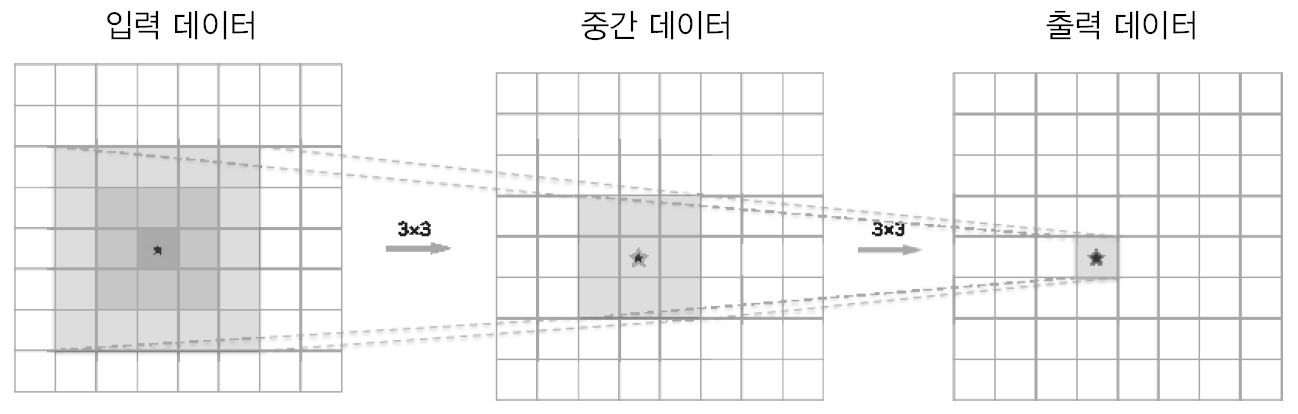

In [6]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-6.png")

$5 \times 5$의 합성곱 연산 1회는 $3 \times 3$의 합성곱 연산을 2회 수행하여 대체할 수 있다. 게다가 전자의 매개변수 수가 25개($5 \times 5$)인 반면, 후자는 총 18개($2 \times 3 \times 3$)이며, 매개변수 수는 층을 반복할수록 줄어들게 된다. 그리고 그 개수의 차이는 층이 깊어질수록 커진다. 예를 들어 $3 \times 3$의 합성곱 연산을 3회 반복하면 매개변수는 모두 27개가 되지만, 같은 크기의 영역을 1회의 합성곱 연산으로 '보기' 위해서는 $7 \times 7$크기의 필터, 즉 매개변수 49개가 필요하게 된다.        

$\textbf{NOTE}$     
> 작은 필터를 겹쳐 신경망을 깊게 할 때의 장점은 매개변수 수를 줄여 넓은 $\small \textbf{수용 영역}^{\text{receptive field}}$을 소화할 수 있다는 데 있다(수용 영역은 뉴런에 변화를 일으키는 국소적인 공간 영역이다). 게다가 층을 거듭하면서 ReLU 등의 활성화 함수를 합성곱 계층 사이에 끼움으로써 신경망의 표현력이 개선되게 된다. 이는 활성화 함수가 신경망에 '비선형'을 부여하고, 비선형 함수가 겹치면서 더 복잡한 것도 표현할 수 있게 되기 때문이다.

학습의 효율성도 층을 깊게 하는 것의 이점이다. 층을 깊게 함으로써 학습 데이터의 양을 줄여 학습을 고속으로 수행할 수 있다는 뜻이다. 이를 (직감적으로) 이해하려면 "7.6 CNN 시각화하기"에서의 설명을 참고하면 좋을 것이다. 7.6절에서 CNN의 합성곱 계층이 정보를 계층적으로 추출하고 있음을 확인하였다. 앞단의 합성곱 계층에서는 에지 등의 단순한 패턴에 뉴런이 반응하고 층이 깊어지면서 텍스처와 사물의 일부와 같이 점차 더 복잡한 것에 반응한다고 설명하였었다.        

그런 네트워크 계층 구조를 기억해두고, '개'를 인식하는 문제를 생각해보자. 이 문제를 얕은 신경망에서 해결하려면 합성곱 계층은 개의 특징 대부분을 한 번에 '이해'해야 한다. 견종도 다양하고 어느 각도에서 찍은 사진이냐에 따라 완전히 다르게 보일 수 있다. 그래서 개의 특징을 이해하려면 변화가 풍부하고 많은 학습 데이터가 필요하며, 결과적으로 학습 시간이 오래 걸리게 된다.

그러나 신경망을 깊게 하면 학습해야 할 문제를 계층적으로 분해가능하다. 각 층이 학습해야 할 문제를 더 단순한 문제로 대체할 수 있는 것이다. 예를 들어 처음 층은 에지 학습에 전념하여 적은 학습 데이터로 효율적으로 학습 가능하다. 개가 등장하는 이미지보다 에지를 포함한 이미지는 많고, 에지의 패턴은 개라는 패턴보다 구조가 훨씬 간단하기 때문이다.

또, 층을 깊게 하면 정보를 계층적으로 전달할 수 있다는 점도 중요하다. 예를 들어 에지를 추출한 층의 다음 층은 에지 정보를 쓸 수 있고, 더 고도의 패턴을 효과적으로 학습하리라 기대할 수 있다. 즉, 층을 깊이 함으로써 각 층이 학습해야 할 문제를 '풀기 쉬운 단순한 문제'로 분해할 수 있어 효율적으로 학습하리라 기대할 수 있다.     

이상이 층을 깊게 하는 것이 왜 중요한가에 대한 보충 설명이다. 단, 최근 일어나고 있는 층의 심화는 층이 깊어도 제대로 학습할 수 있도록 해주는 새로운 기술과 환경(빅데이터와 컴퓨터 연산 능력 등)이 뒷받침되어 나타난 현상임을 잊지 말자.

## 8.2 딥러닝의 초기 역사
딥러닝이 지금처럼 큰 주목을 받게 된 계기는 이미지 인식 기술을 겨루는 장인 $\small \text{ILSVRC}^{\text{ImageNet Large Scale Visual Recognition Challenge}}$의 2012년 대회이다. 그 해의 대회에서 딥러닝에 기반한 기법, 일명 AlexNet이 압도적인 성적으로 우승하면서 그동안의 이미지 인식에 대한 접근법을 근간부터 뒤흔들게 되었다. 이 2012년 딥러닝의 역습이 전환점이 되어, 그 후로는 대회의 주역은 항상 딥러닝이었다. 이번 절에서는 ILSVRC 대회를 축으로 최근의 딥러닝 트렌드를 살펴보고자 한다.

### 8.2.1 이미지넷
$\small \textbf{이미지넷}^{\text{ImageNet}}$은 100만 장이 넘는 이미지를 담고 있는 데이터셋이다. [그림8-7]과 같이 다양한 종류의 이미지를 포함하여 각 이미지에는 레이블(클래스 이름)이 붙어 있다. 매년 열리는 ILSVRC는 이 거대한 데이터셋을 사용하여 자웅을 겨루는 천하제일 이미지 인식 기술 대회인 셈이다.

#### [그림8-7] 대규모 데이터셋 ImageNet의 데이터들

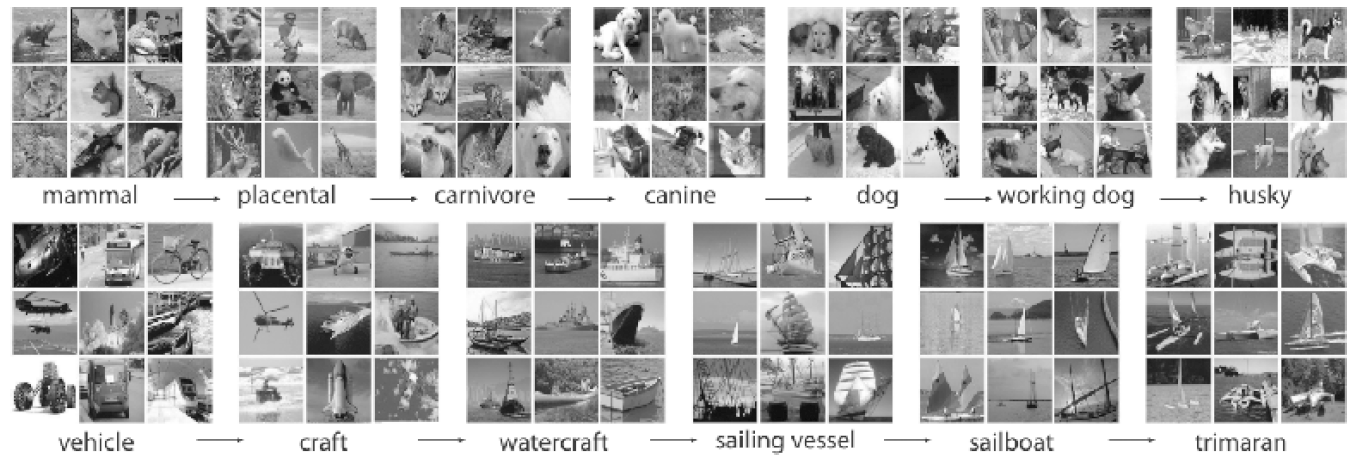

In [2]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-7.png")

ILSVRC 대회에는 시험 항목이 몇 가지 있는데, 그중 하나가 $\small \textbf{분류}^{\text{classification}}$이다. 분류 부문에서는 1,000개의클래스를 제대로 분류하는지를 겨룬다. 그럼 최근 ILSVRC의 분류 시험 결과를 살펴보자. [그림8-8]은 2010년부터 최근까지 ILSVRC의 분류 부분 우승팀의 성적이다. 여기에서는 $\small \textbf{톱-5 오류}^{\text{top-5 error}}$를 막대 그래프로 나타내었다. 톱-5 오류란 확률이 가장 높다고 생각되는 후보 클래스 5개 안에 정답이 포함되지 않은, 즉 5개 모두가 틀린 비율이다.

#### [그림8-8] ILSVRC 최우수 팀의 성적 추이
세로축은 오류율, 가로축은 연도, 가로축의 괄호 안은 팀 이름(또는 기법 이름)

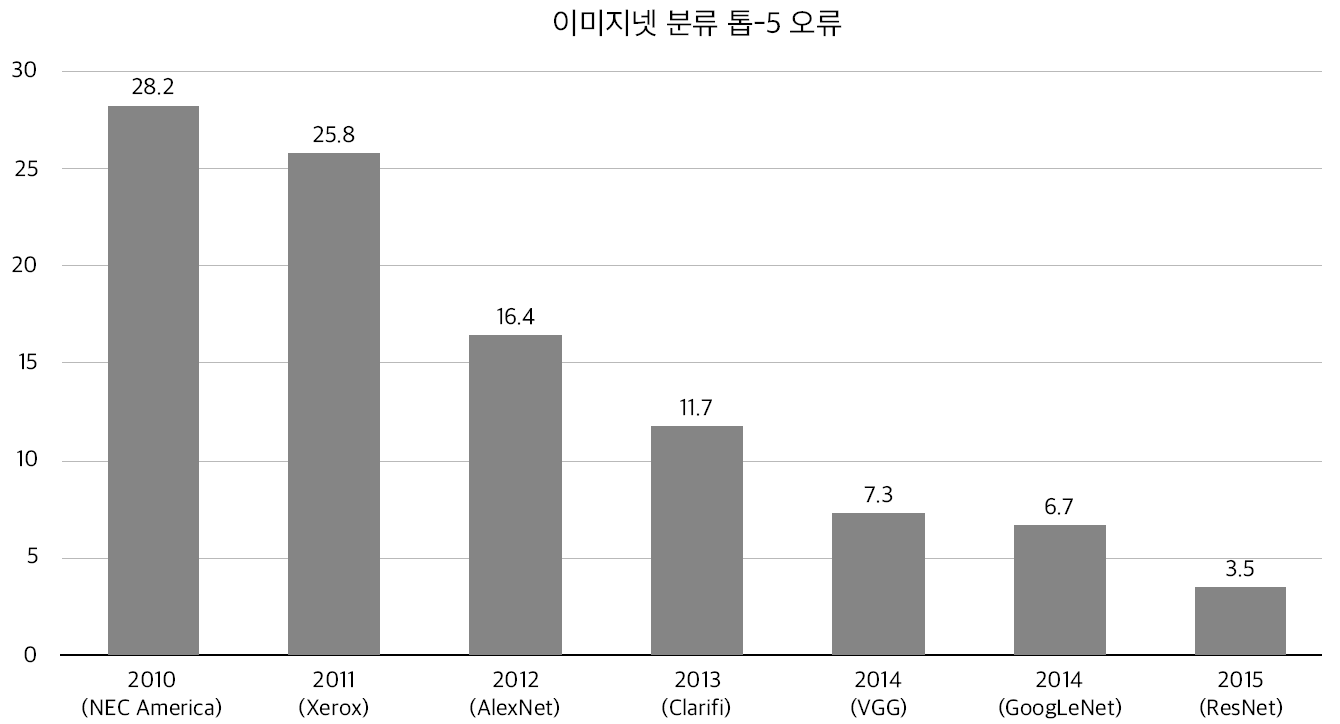

In [3]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-8.png")

[그림8-8]에서 주목할 점은 2012년 이후 선두는 항상 딥러닝 방식이라는 것이다. 실제로 2012년의 AlexNet이 오류율을 크게 낮췄고, 그 후 딥러닝을 활용한 기법이 꾸준히 정확도를 개선해왔다. 특히 2015년에는 150층이 넘는 심층 신경망인 ResNet이 오류율을 3.5%까지 낮췄다. 덧붙여서, 이 결과는 일반적인 인간의 인식 능력을 넘어섰다고 한다.

최근 몇 년 빼어난 성적을 거두고 있는 딥러닝 중에서도 VGG, GoogLeNet, ResNet은 특히 유명하며, 다양한 딥러닝 분야에서 활용되고 있다. 이어지는 절들에서는 이 세 가지 유명 신경망에 대해 간단히 소개하고자 한다.

### 8.2.2 VGG
VGG는 합성곱 계층과 풀링 계층으로 구성되는 '기본적'인 CNN이다. 다만, [그림8-9]와 같이 비중 있는 층(합성곱 계층, 완전연결 계층)을 모두 16층(혹은 19층)으로 심화한 게 특징이다(층의 깊이에 따라 'VGG-16'과 'VGG-19'로 구분하기도 한다).       

#### [그림8-9] VGG

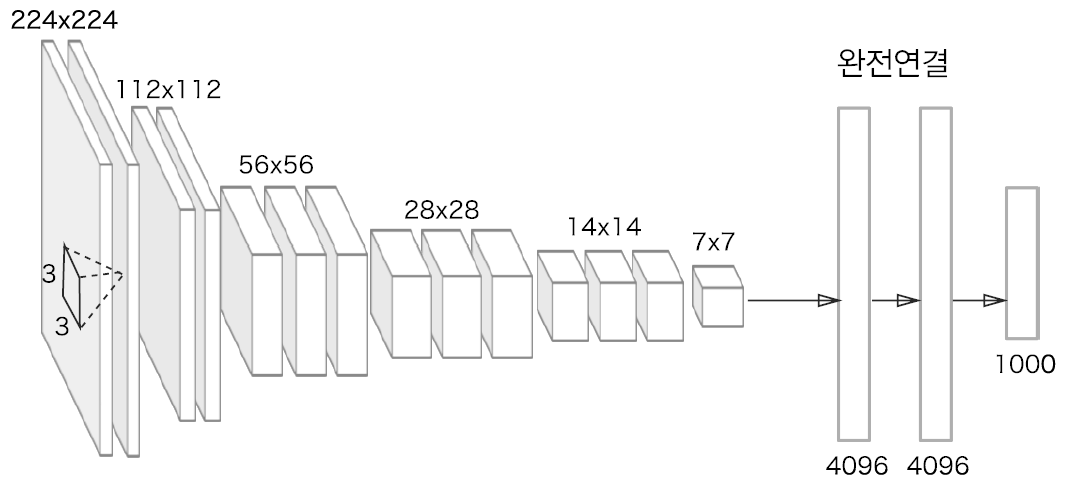

In [4]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-9.png")

VGG에서 주목할 점은 $3 \times 3$의 작은 필터를 사용한 합성곱 계층을 연속으로 거친다는 것이다. 그림에서 보듯 합성곱 계층을 2~4회 연속으로 풀링 계층을 두어 크기를 절반으로 줄이는 처리를 반복한다. 그리고 마지막에는 완전연결 계층을 통과시켜 결과를 출력한다.       

$\textbf{NOTE}$     
> VGG는 2014년 대회에서 2위에 올랐다. 성능 면에서는 1위인 GoogLeNet에 뒤지지만, VGG는 구성이 간단하여 응용하기에 좋다. 그래서 많은 기술자가 VGG 기반의 신경망을 즐겨 사용한다.

### 8.2.3 GoogLeNet
GoogLeNet의 구성은 [그림8-10]과 같다. 그림의 사각형이 합성곱 계층과 풀링 계층등의 계층을 나타낸다.

#### [그림8-10] GoogLeNet

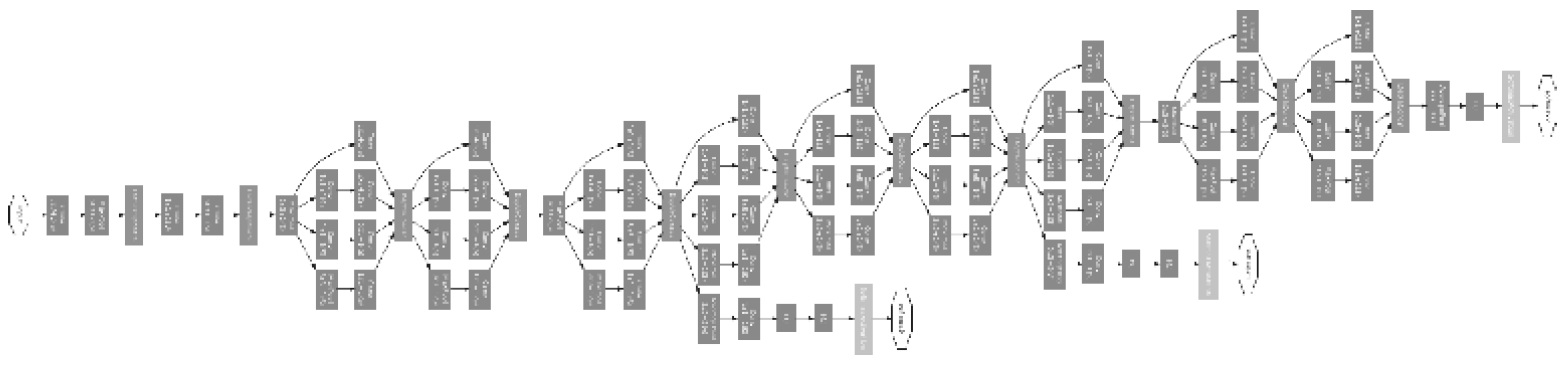

In [5]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-10.png")

그림을 보면 구성이 매우 복잡해 보이나, 기본적으로는 지금까지 보아온 CNN과 크게 다르지 않다. 단, GoogLeNet은 세로 방향 깊이 뿐 아니라 가로 방향 깊이도 깊다는 점이 특징이다.     

GoogLeNet에는 가로 방향에 '폭'이 있다. 이를 인셉션 구조라 하며, 그 기반 구조는 [그림8-11]과 같다.       

#### [그림8-11] GoogLeNet의 인셉션 구조

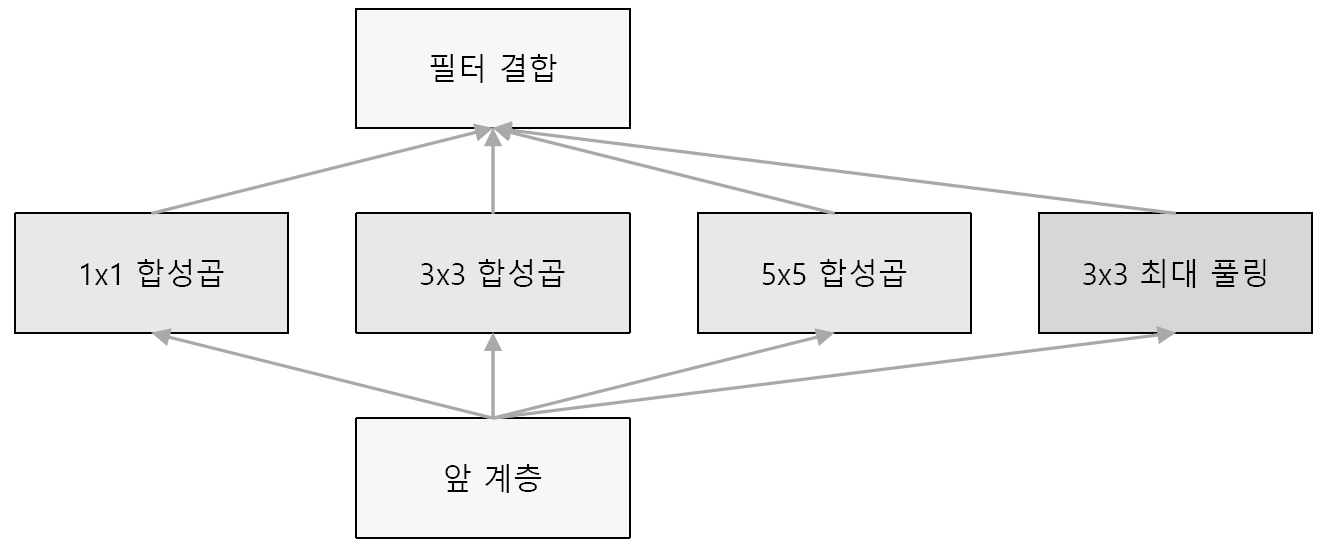

In [6]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-11.png")

인셉션 구조는 [그림8-11]과 같이 크기가 다른 필터(와 풀링)를 여러 개 적용하여 그 결과를 결합한다. 이 인셉션 구조를 하나의 빌딩 블록(구성 요소)으로 사용하는 것이 GoogLeNet의 특징인 것이다. 또 GoogLeNet에서는 $1 \times 1$크기의 필터를 사용한 합성곱 계층을 많은 곳에서 사용한다. 이 $1 \times 1$의 합성곱 연산은 채널 쪽으로 크기를 줄이는 것으로, 매개변수 제거와 고속 처리에 기여하게 된다.

### 8.2.4 ResNet
$\small \textbf{ResNet}^{\text{Residual Network}}$은 마이크로소프트의 팀이 개발한 네트워크이다. 그 특징은 지금까지보다 층을 더 깊게 할 수 있는 특별한 '장치'에 있다.        

지금까지 층을 깊게 하는 것이 성능 향상에 중요하다는 건 알고 있었다. 그러나 딥러닝의 학습에서는 층이 지나치게 깊으면 학습이 잘 되지 않고, 오히려 성능이 떨어지는 경우도 많다. ResNet에서는 그런 문제를 해결하기 위해서 $\small \textbf{스킵 연결}^{\text{skip connection}}$을 도입한다. 이 구조가 층의 깊이에 비례하여 성능을 향상시킬 수 있게 한 핵심이다(물론 층을 깊게 하는 데에는 여전히 한계가 존재한다).       

스킵 연결이란 [그림8-12]와 같이 입력 데이터를 합성곱 계층을 건너뛰어 출력에 바로 더하는 구조를 말한다.      

#### [그림8-12] ResNet의 구성요소 : 'weight layer'는 합성곱 계층을 말한다.

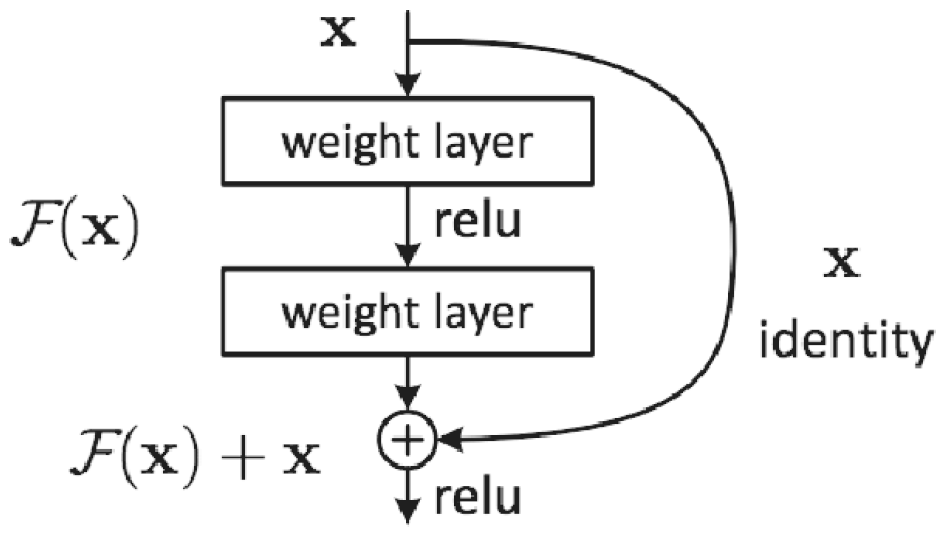

In [7]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-12.png")

[그림8-12]에서는 입력 $x$를 연속한 두 합성곱 계층을 건너뛰어 추력에 바로 연결한다. 이 단축 경로가 없었다면 두 합성곱 계층의 출력이 $F(x)$가 되지만, 스킵 연결로 인해 $F(x) + x$가 되는 게 핵심이다. 스킵 연결은 층이 깊어져도 학습을 효율적으로 할 수 있도록 해주는데, 이는 역전파 때 스킵 연결이 신호 감쇠를 막아주기 때문이다.        

$\textbf{NOTE}$     
> 스킵 연결은 입력 데이터를 '그대로' 흘리는 것으로, 역전파 때도 상류의 기울기를 그대로 하류로 흘려보낸다. 여기에서의 핵심은 상류의 기울기에 아무런 수정도 가하지 않고 '그대로' 흘린다는 것이다. 그래서 스킵 연결로 기울기가 작아지거나 지나치게 커질 걱정 없이 앞 층에 '의미 있는 기울기'가 전해지리라 기대할 수 있다. 층을 깊게 할수록 기울기가 작아지는 소실 문제를 이 스킵 연결이 완화시켜주는 것이다.

ResNet은 먼저 설명한 VGG 신경망을 기반으로 스킵 연결을 도입하여 층을 깊게 하였다. 그 결과는 [그림8-13]처럼 된다.        

[그림8-13] ResNet : 블록이 $3 \times 3$인 합성곱 계층에 대응. 층을 건너뛰는 스킵 연결이 특징이다.

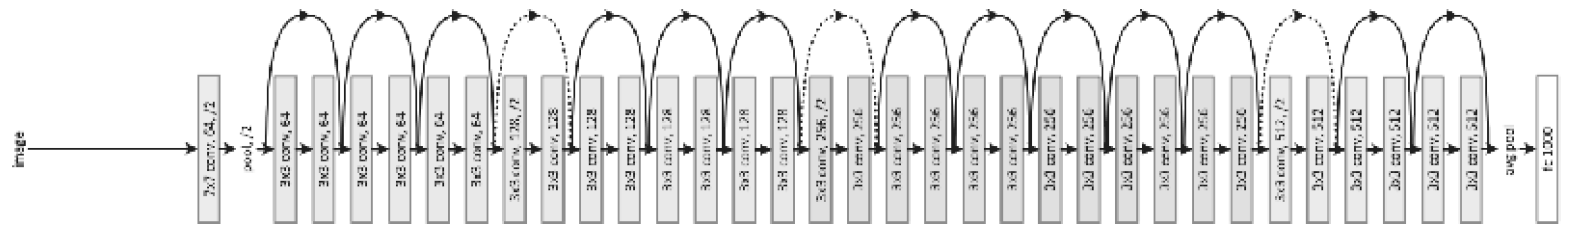

In [8]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-13.png")

[그림8-13]과 같이 ResNet은 합성곱 계층을 2개 층마다 건너뛰면서 층을 깊게 한다. 실험 결과 150층 이상으로 해도 정확도가 오르는 모습을 확인할 수 있었다. 그리고 ILSVRC 대회에서는 톱-5 오류율이 겨우 3.5%라는 경이적인 결과를 내었다.      

$\textbf{NOTE}$     
> 이미지넷이 제공하는 거대한 데이터셋으로 학습한 가중치 값들은 실제 제품에 활용해도 효과적이고, 또 많이들 그렇게 이용하고 있다. 이를 $\small \textbf{전이 학습}^{\text{transfer learning}}$이라고 해서, 학습된 가중치(혹은 그 일부)를 다른 신경망에 복사한 다음, 그 상태로 재학습을 수행한다. 예를 들어 VGG와 구성이 같은 신경망을 준비하고, 미리 학습된 가중치를 초깃값으로 설정한 후, 새로운 데이터셋을 대상으로 재학습(fine tuning)을 수행한다. 전이 학습은 보유한 데이터셋이 적을 때 특히 유용한 방법이다.

## 8.3 더 빠르게(딥러닝 고속화)
빅데이터와 네트워크의 발전으로 딥러닝에서는 대량의 연산을 수행가능해졌다. 과거에는 주로 CPU가 계산을 담당했으나, CPU만으로 딥러닝을 처리하기는 부족한 게 현실이다. 실제로 주위를 둘러보면 딥러닝 프레임워크 대부분은 $\small \textbf{GPU}^{\text{Graphics Processing Unit}}$을 활용하여 대량의 연산을 고속으로 처리할 수 있다. 최근 프레임워크에서는 학습을 복수의 GPU와 여러 기기로 분산 수행하기 시작하였다. 이번 절에서는 딥러닝의 고속화에 관해 이야기해보고자 한다.

### 8.3.1 풀어야 할 숙제
딥러닝의 고속화 얘기를 시작하기 앞서, 딥러닝에서는 어떠한 처리에 시간이 소요되는지를 보도록 해보자. [그림8-14]는 AlexNet의 forward 처리(순전파)에서 각 층이 소비하는 시간을 원 그래프로 보여준다.

#### [그림8-14] AlexNet의 forward 처리 시 각 층의 시간 비율
왼쪽이 GPU, 오른쪽이 CPU를 사용한 경우. 'conv'는 합성곱 계층, 'pool'은 풀링 계층, 'fc'는 완전연결 계층, 'norm'은 정규화 계층이다.

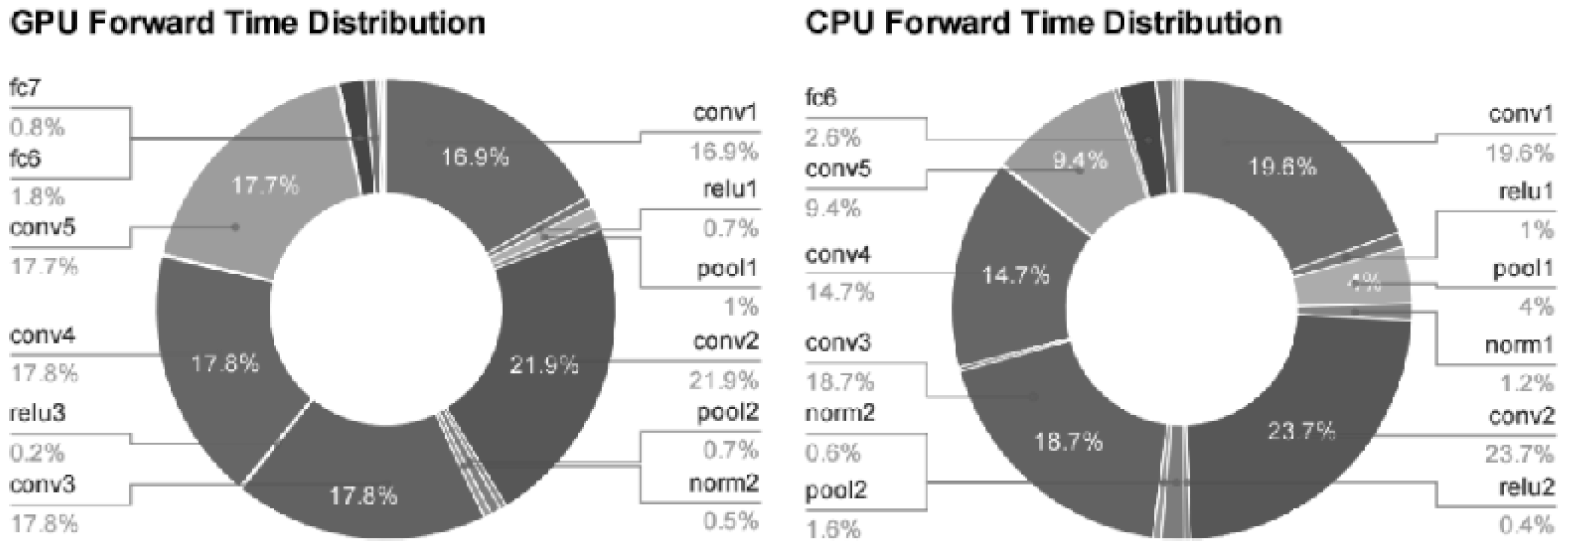

In [9]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-14.png")

그림에서 보듯 AlexNet에서는 오랜 시간을 합성곱 계층에서 소요한다. 실제로 합성곱 계층의 처리 시간을 다 더하면 GPU에서는 전체의 95%, CPU에서는 전체의 89%까지 달하게 된다. 그래서 합성곱 계층에서 이뤄지는 연산을 어떻게 고속으로 효율적으로 처리하느냐가 딥러닝의 과제가 된다. [그림8-14]는 추론 때의 결과지만, 학습 시에도 마찬가지로 합성곱 계층에서 많은 시간을 소비하게 된다.

$\textbf{NOTE}$     
> 합성곱 계층에서 수행하는 연산은 결국 '단일 곱셈-누산'이다. 그래서 딥러닝 고속화라는 주제는 대량의 '단일 곱셈-누산'을 어떻게 고속으로 효율적으로 계산하느냐는 문제로 귀결되게 된다.

### 8.3.2 GPU를 활용한 고속화
GPU는 원래 그래픽 전용 보드에 이용해왔다. 그러나 최근에는 그래픽 처리뿐 아니라 범용 수치 연산에도 이용한다. GPU는 병렬 수치 연산을 고속으로 처리할 수 있으니, 그 압도적인 힘을 다양한 용도로 활용하자는 것이 $\small \textbf{GPU 컴퓨팅}$의 목적이다. 이처럼 GPU로 범용 수치 연산을 수행하는 것을 GPU 컴퓨팅이라고 한다.        

딥러닝에서는 대량의 단일 곱셈-누산(또는 큰 행렬의 곱)을 수행해야 한다. 이러한 대량 병렬 연산은 GPU의 특기이다(반대로 CPU는 연속적인 복잡한 계산을 잘 처리한다). 그래서 딥러닝 연산에서는 GPU를 이용하면 CPU만 쓸 때보다 놀라울 정도로 빠르게 결과를 얻을 수 있다. 그렇다면 과연 GPU로 어느 정도까지 빨라지는지 예를 통해 확인해보자. [그림8-15]는 AlexNet의 학습 시간을 CPU와 GPU에서 비교한 결과이다.      

#### [그림8-15] AlexNet의 학습 시간을 '16코어 제온 CPU'와 엔비디아 '타이탄 GPU'에서 비교한 결과

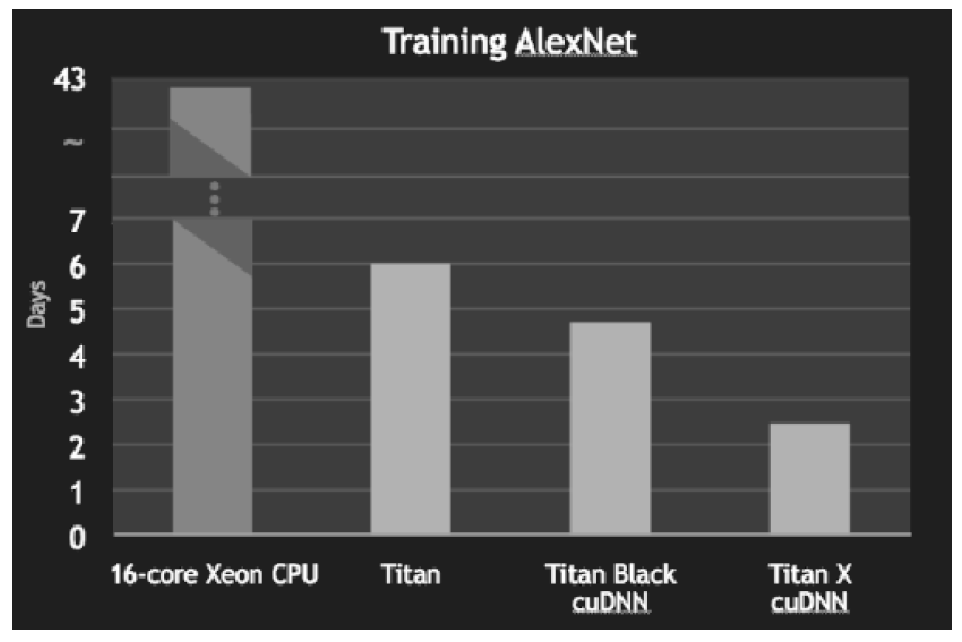

In [10]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-15.png")

그림과 같이 CPU에서는 40여 일이나 걸리지만 GPU로는 6일까지 단축되었다. 또, cuDNN이라는 딥러닝에 최적화된 라이브러리를 이용하면 더욱 빨라짐을 확인할 수 있다.        

GPU는 주로 엔비디아와 AMD, 두 회사가 제공한다. 두 회사의 GPU 모두 범용 수치 연산에 이용가능하지만, 딥러닝과 더 '친숙한'쪽은 아직까지 엔비디아이다. 실제로 대부분의 딥러닝 프레임워크는 엔비디아 GPU에서만 혜택을 받을 수 있다. 엔비디아의 GPU 컴퓨팅용 통합 개발 환경인 $\small \textbf{CUDA}$를 사용하기 때문이다. [그림8-15]에 등장하는 $\small \textbf{cuDNN}$은 CUDA 위에서 동작하는 라이브러리로, 딥러닝에 최적화된 함수 등이 구현되어 있다.       

$\textbf{NOTE}$     
> 합성곱 계층에서 행하는 연산은 `im2col`을 이용해 큰 행렬의 곱으로 변환할 수 있었다. 이러한 `im2col`의 방식은 GPU로 구현하기에도 적합하다. GPU는 '작은' 단위로 계산하기보다는 큰 덩어리를 한번에 계산하는 데 유리하기 때문이다. 즉, `im2col`로 거대한 행렬의 곱으로 한 번에 계산하여 GPU를 최대한으로 활용하는 것이다.

### 8.3.3 분산 학습
GPU로 딥러닝 연산을 꽤 가속할 수 있지만, 그래도 심층 신경망에서는 학습에 며칠 혹은 몇 주가 걸리기도 한다. 그리고 지금까지 살펴본 것처럼 딥러닝은 많은 시행착오를 동반한다. 뛰어난 신경망을 만들려면 시험을 수없이 반복해야 하고, 그러려면 1회 학습에 걸리는 시간을 최대한 단축하고 싶다는 요구가 필연적으로 생겨나게 된다. 그래서 딥러닝 학습을 $\small \text{수평 확장}^{\text{scale out}}$하자는 아이디어(즉, '분산 학습')가 중요해지는 것이다.       

딥러닝 계산을 더욱 고속화하고자 다수의 GPU와 기기로 계산을 분산하기도 한다. 최근에는 다수의 GPU와 컴퓨터를 이용한 분산 학습을 지원한 딥러닝 프레임워크들이 나타나고 있다. 그중에서도 구글의 텐서플로와 마이크로소프트의 $\small \text{CNTK}^{\text{Computational Network Toolkit}}$는 분산 학습에 역점을 두고 개발되고 있었다. 거대한 데이터센터의 $\small \text{저지연}\cdot  \text{고처리량}^{\text{low latency, high throughout}}$네트워크 위에서 이 프레임워크들이 수행하는 분산 학습은 놀라운 효과를 보였다.

분산 학습까지 더하면 어느 수준까지 고속화할 수 있을까? [그림8-16]은 텐서플로로 알아본 분산 학습의 효과이다.     

#### [그림8-16] 텐서플로의 분산 학습 성능 : 가로는 GPU의 수, 세로는 GPU 1개일 때와 비교한 비율

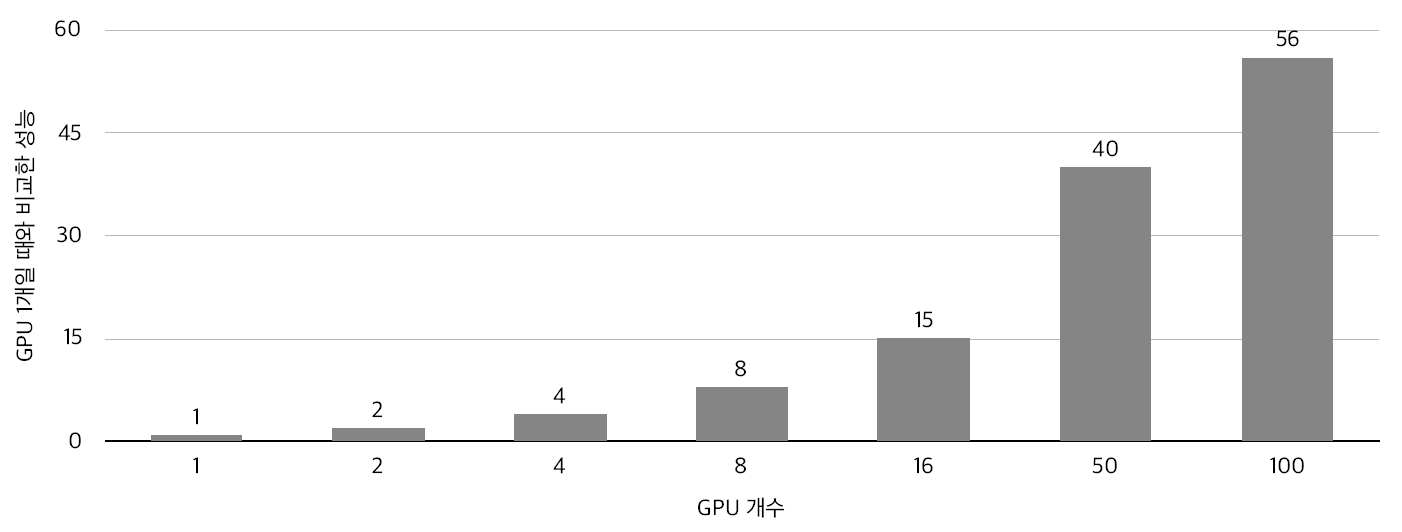

In [11]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-16.png")

[그림8-16]에서 보듯 GPU 수가 늘어남에 따라 학습도 빨라진다. 실제로 여러 기기를 연결하여 GPU를 100개까지 사용하니 하나일 때보다 56배가 빨라짐을 확인할 수 있다. 7일짜리 작업을 불과 3시간 만에 끝낸다는 것으로, 분산 학습의 놀라운 효과를 실험적으로 증명하고 있다.      

분산 학습에서도 '계산을 어떻게 분산시키느냐'는 몹시 어려운 문제이다. 컴퓨터 사이의 통신과 데이터 동기화 등, 쉽게 해결할 수 없는 문제를 얼마든지 끌어안게 된다. 그래서 이런 어려운 문제는 텐서플로나 파이토치 같은 뛰어난 프레임워크에 맡기는 것이 좋다. 여기에서는 분산 학습의 상세 내용은 다루지 않는다. 분산 학습 관련 기술적인 내용은 해당 프레임워크 공식 사이트에서 참고하도록 하자.

### 8.3.4 연산 정밀도와 비트 줄이기
계산 능력 외에도 메모리 용량과 버스 대역폭 등이 딥러닝 고속화에 병목이 될 수 있다. 메모리 용량 면에서는 대량의 가중치 매개변수와 중간 데이터를 메모리에 저장해야 한다는 것을 생각해야 한다. 버스 대역폭 면에서는 GPU(혹은 CPU)의 버스를 흐르는 데이터가 많아져 한계를 넘어서면 병목이 된다. 이러한 경우를 고려하면 네트워크로 주고받는 데이터의 비트 수는 최소로 만드는 것이 바람직하다.        

컴퓨터에서는 주로 64비트나 32비트 부동소수점 수를 사용하여 실수를 표현하게 된다. 많은 비트를 사용할수록 계산 오차는 줄어들지만, 그만큼 계산에 드는 비용과 메모리 사용량이 늘고 버스 대역폭에 부담을 주게 된다.      

다행히 딥러닝은 높은 수치 정밀도(수치를 몇 비트로 표현하느냐)를 요구하지 않는다. 이는 신경망의 중요한 성질 중 하나로, 신경망의 견고성에 따른 특성이다. 예를 들어 신경마은 입력 이미지에 노이즈가 조금 섞여 있어도 출력 결과가  잘 달라지지 않는 강건함을 보여준다. 이런 견고성 덕분에 신경망에 흐르는 데이터를 '퇴화'시켜도 출력에 주는 영향은 적다고 할 수 있다.       

컴퓨터에서 실수를 표현하는 방식으로 $\small \textbf{32비트 단정밀도}^{\text{single-precision}}$와 $\small \textbf{64비트 배정밀도}^{\text{double-precision}}$부동소수점 등의 포맷이 있지만, 지금까지의 실험으로는 딥러닝은 $\small \textbf{16비트 반정밀도}^{\text{half-precision}}$만 사용해도 학습에 문제가 없다고 알려져 있다. 실제로 엔비디아의 2016년 GPU인 $\small \textbf{파스칼}^{\text{Pascal}}$아키텍처는 이 포맷을 지원하며, 이제는 반정밀도 부동소수점또한 학습의 표준이 되었다.        

$\textbf{NOTE}$     
> 엔비디아의 $\small \text{맥스웰}^{\text{Maxwell}}$세대 GPU는 반정밀도 부동소수점 수를 스토리지(데이터를 저장하는 기능)로 지원하고 있었지만, 연산 자체는 16비트로 수행하지 않았다. 이것이 파스칼 세대에 와서 연산 역시 16비트로 진행하게 됨으로써, 이전 세대보다 2배 정도 빨라지게 되었다.

이 책은 지금까지 딥러니을 구현하며 수치 정밀도에는 특별히 주의하지 않았었다. 그럼 몇 가지를 짚어보자. 우선 파이썬에서는 일반적으로 64비트 배정밀도 부동소수점 수를 사용한다. 하지만 넘파이는 16비트 반정밀도 부동소수점도 지원하며, 이를 사용해도 정확도가 떨어지지 않는 것을 쉽게 확인할 수 있다(단, 스토리지로서 16비트라는 틀이 있을 뿐 연산 자체는 16비트로 수행하지 않는다). 관련 코드는 ch08/half_float_network.py를 참고하자.

딥러닝의 비트 수를 줄이는 연구가 몇 가지 진행되고 있다. 최근에는 가중치와 중간 데이터를 1비트로 표현하는 $\small \text{<Binarized Neural Networks>}$라는 방법이 등장하였었으며, 최근에는 1-bit LLM이라는 방법도 등장하였다. 딥러닝을 고속화하기 위해 비트를 줄이는 기술은 앞으로 주시해야 할 분야이며, 특히 딥러닝을 임베디드용으로 이용할 때 중요한 주제이다.

## 8.4 딥러닝의 활용
지금까지 딥러닝을 활용한 예를 손글씨 숫자 인식이라는 이미지 분류를 중심으로 살펴보았다. 이는 '사물 인식'의 한 분야이다. 그러나 딥러닝은 사물 인식뿐 아니라 온갖 문제에 적용가능하다. 이미지, 음성, 자연어 등 수많은 분야에서 딥러닝은 뛰어난 성능을 발휘하고 있다. 이번 절에서는 딥러닝이 적용 될 수 있는 분야에 대해 컴퓨터 비전을 중심으로 몇 가지 소개하고자 한다.

### 8.4.1 사물 검출
사물 검출은 [그림8-17]과 같이 이미지 속에 담긴 사물의 위치와 종류(클래스)를 알아내는 기술이다.      

#### [그림8-17] 사물 검출의 예

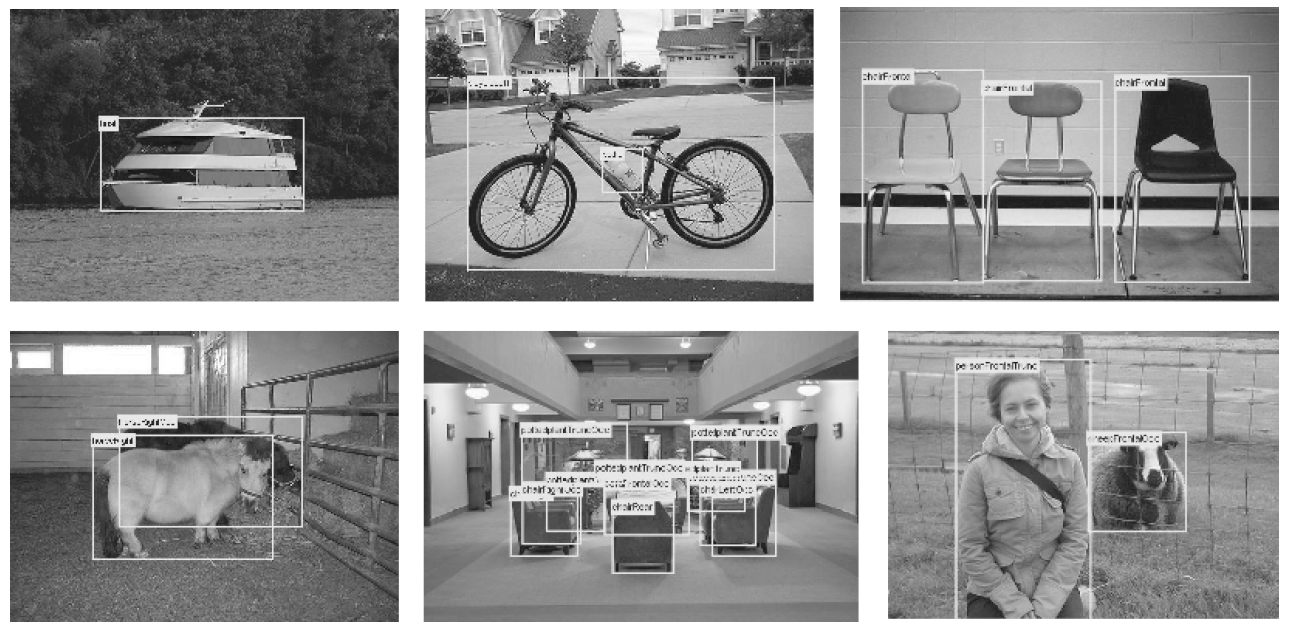

In [2]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-17.png")

이 그림에서 보듯 사물 검출은 사물 인식보다 어려운 문제이다. 지금까지 본 사물 인식은 이미지 전체를 대상으로 했는데, 사물 검출에서는 이미지 어딘가에 있을 사물의 위치까지 알아내야 한다. 게다가 한 이미지에 여러 사물이 존재할 수도 있다.     

이런 사물 검출 문제에 CNN을 기반으로 한 기법이 몇 가지 제안되었다. 이 기법들이 발군의 성능을 보이면서 사물 검출에도 딥러닝이 효과적임을 시사하였었다.       

CNN을 이용하여 사물 검출을 수행하는 방식은 몇 가지가 있는데, 그중에서도 $\small \textbf{R-CNN}^{\text{Regions with Convolutional Neural Networks}}$가 유명하다. [그림8-18]은 R-CNN의 처리 흐름이다.     

#### [그림8-18] R-CNN의 처리 흐름

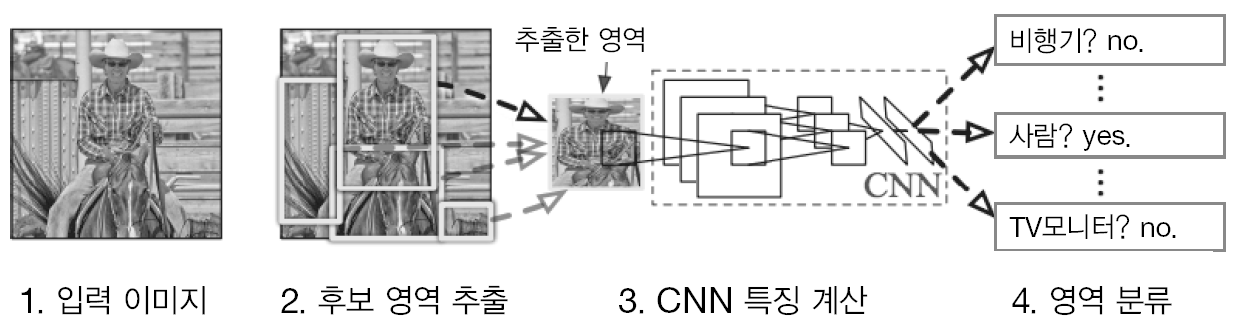

In [3]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-18.png")

R-CNN 그림에서 주목할 것은 '2. 후보 영역 추출'과 '3. CNN 특징 계산'이다. 먼저 사물이 위치한 영역을 (어떤 방법으로) 찾아내고, 추출한 각 영역에 CNN을 적용하여 클래스를 분류하는 것이다. 여기서 이미지를 사각형으로 변형하거나 분류할 때 $\small \text{서포트 벡터 머신}^{\text{SVM}}$을 사용하는 등 실제 처리 흐름은 다소 복잡하지만, 큰 틀에서는 이 두 가지 처리(후보 영역 추출과 CNN 특징 계산)로 구성된다.        

후보 영역 추출(사물처럼 보이는 물체를 찾아 처리)에는 컴퓨터 비전 분야에서 발전해온 다양한 기법을 사용할 수 있고, R-CNN 논문에서는 Selective Search 기법을 사용하였다. 이러한 후보 영역 추출까지 CNN으로 처리하는 $\small \textbf{Faster R-CNN}$기법도 등장하였었다. Faster R-CNN은 모든 일을 하나의 CNN에서 처리하기 때문에 아주 빠르다.

### 8.4.2 분할
$\small \textbf{분할}^{\text{segmentation}}$이란 이미지를 픽셀 수준에서 분류하는 문제이다. [그림8-19]와 같이 픽셀 단위로 객체마다 채색된 $\small \text{지도}^{\text{supervised}}$데이터를 사용하여 학습한다. 그리고 추론할 때 입력 이미지의 모든 픽셀을 분류한다.       

#### [그림8-19] 분할의 예 : 왼쪽이 입력 이미지, 오른쪽이 지도용 이미지

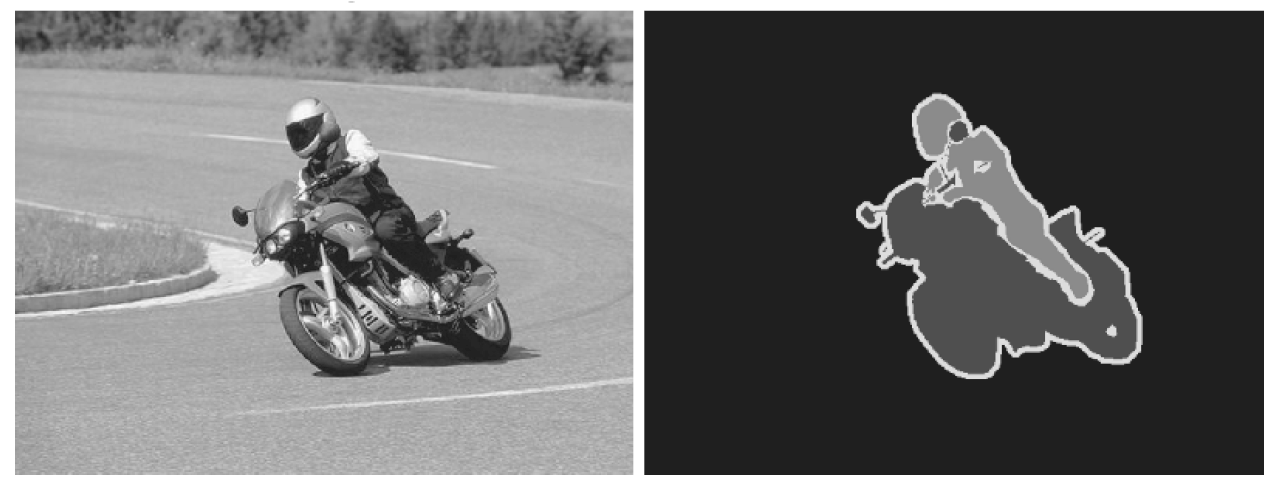

In [4]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-19.png")

지금까지 구현한 신경망은 분류를 이미지 전체를 대상으로 해왔다. 이를 픽셀 수준에 적용하려면 어떻게 하면 될까?        

신경망을 이용하여 분할하는 가장 단순한 방법은 모든 픽셀 각각을 추론하는 것이다. 예를 들어 어떤 직사각형 영역의 중심 픽셀의 클래스를 분류하는 신경망을 만들어서, 모든 픽셀을 대상으로 하나씩 추론 작업을 실행한다. 짐작한 대로 이런 식으로는 픽셀의 수만큼 forward 처리를 해야 하기에 긴 시간이 걸리게 된다(정확히는 합성곱 연산에서 많은 영역을 쓸데없이 다시 계산하는 것이 문제가 된다). 이러한 낭비를 줄여주는 기법으로 $\small \text{FCN}^{\text{Fully Convolutional Network}}$이 고안되었다. 이는 단 한 번의 forward 처리만으로 모든 픽셀의 클래스를 분류해주는 놀라운 기법이다.        

#### [그림8-20] FCN의 전체 그림

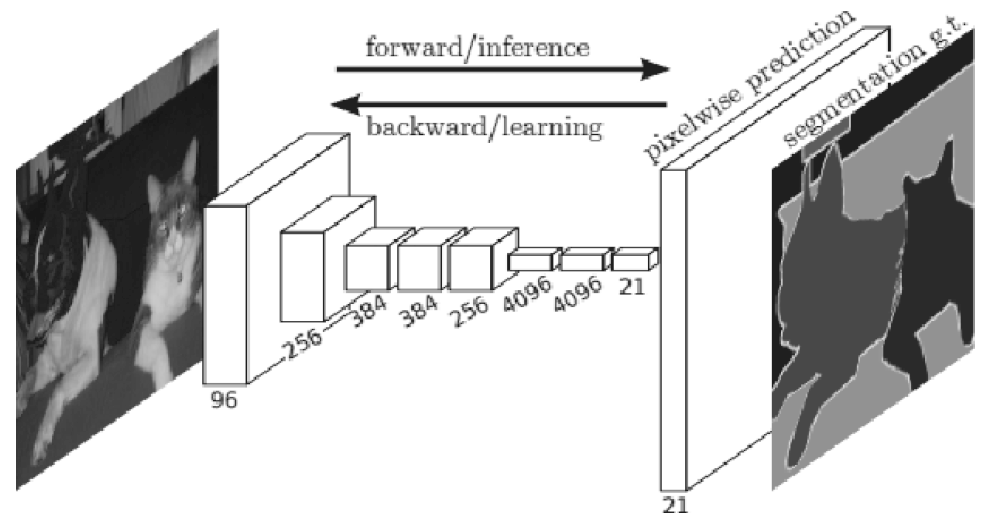

In [5]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-20.png")

Fully Convolutional Network 를 직역하면 '합성곱 계층만으로 구성된 네트워크'가 된다. 일반적인 CNN이 완전연결 계층을 이용하는 반면, FCN은 이 완전연결 계층을 '같은 기능을 하는 합성곱 계층'으로 바꾼다. 사물 인식에서 사용한 신경망의 완전연결 계층에서는 중간 데이터의 공간 볼륨(다차원 형태)을 1차원으로 변환하여 한 줄로 늘어선 노드들이 처리하였으나, FCN에서는 공간 볼륨을 유지한 채 마지막 출력까지 처리할 수 있다는 것이다.        

FCN은 [그림8-20]에서 보듯 마지막에 공간 크기를 확대하는 처리를 도입했다는 것도 특징이다. 이 확대 처리로 인해 줄어든 중간 데이터를 입력 이미지와 같은 크기까지 단번에 확대할 수 있다. FCN의 마지막에 수행하는 확대는 $\small \text{이중 선형 보간}^{\text{bilinear interpolation}}$에 의한 확대이다. FCN에서는 이 선형 확대를 $\small \text{역합성곱}^{\text{deconvolution}}$연산으로 구현해내고 있다.       

$\textbf{NOTE}$     
> 완전연결 계층에서는 출력이 모든 입력과 연결된다. 이와 같은 구성을 합성곱 계층으로도 구현할 수 있다. 가령 입력 크기가 $32 \times 10 \times 10$(채널 32개, 높이 10, 너비 10)인 데이터에 대한 완전연결 계층은 필터 크기가 $32 \times 10 \times 10$인 합성곱 계층으로 대체할 수 있다. 만약, 완전연결 계층의 출력 노드가 100개라면 합성곱 계층에서는 기존의 $32 \times 10 \times 10$필터를 100개 준비하면 완전히 같은 처리를 할 수 있다. 이처럼 완전연결 계층은 같은 일을 수행하는 합성곱 계층으로 대체할 수 있다.

### 8.4.3 사진 캡션 생성
컴퓨터 비전과 자연어를 융합한 재미있는 연구가 있다. [그림8-21]과 같은 사진을 주면, 그 사진을 설명하는 글(사진 캡션)을 자동으로 생성하는 연구이다.       

#### [그림8-21] 딥러닝으로 사진 캡션을 생성하는 예

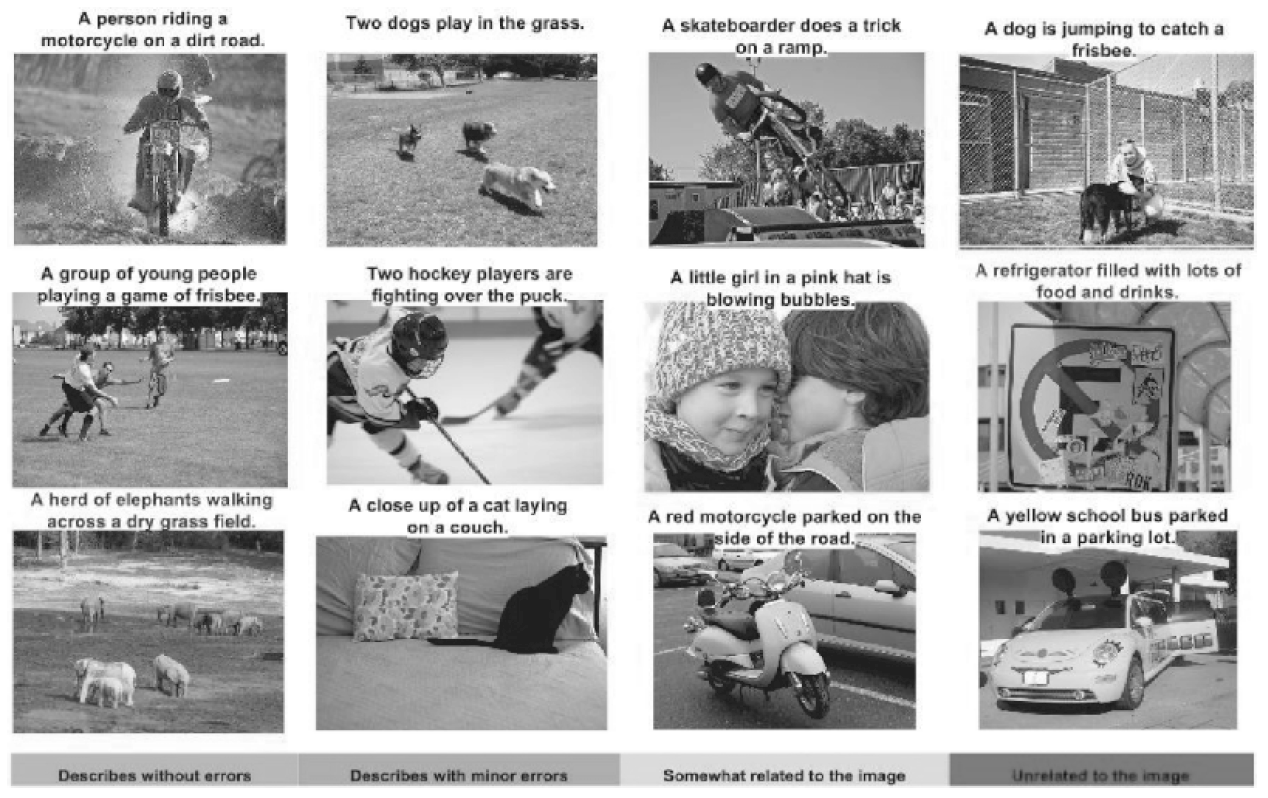

In [6]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-21.png")

예를 들어 [그림8-21]의 첫 번째는 사진만 보고 "비포장도로에서 오토바이를 타는 사람(A person riding a motorcycle on a dirt road)"이라는 문장을 자동으로 생성한다. 설명과 사진이 정확히 일치함을 알 수 있다. 오토바이를 타고 있다는 것뿐만 아니라 거친 비포장도로라는 것도 '이해'하고 있다는 점은 매우 놀랍다고 볼 수 있다.

딥러닝으로 사진 캡션을 생성하는 방법으로는 $\small \text{NIC}^{\text{Neural Image Caption}}$모델이 대표적이다. NIC는 [그림8-22]와 같이 심층 CNN과 자연어를 다루는 $\small \textbf{순환 신경망}^{\text{Recurrent Neural Network, RNN}}$으로 구성된다. RNN은 순환적 관계를 갖는 신경망으로 자연어나 시계열 데이터 등의 연속된 데이터를 다룰 때 많이 활용한다.     

#### [그림8-22] NIC의 전체 구성

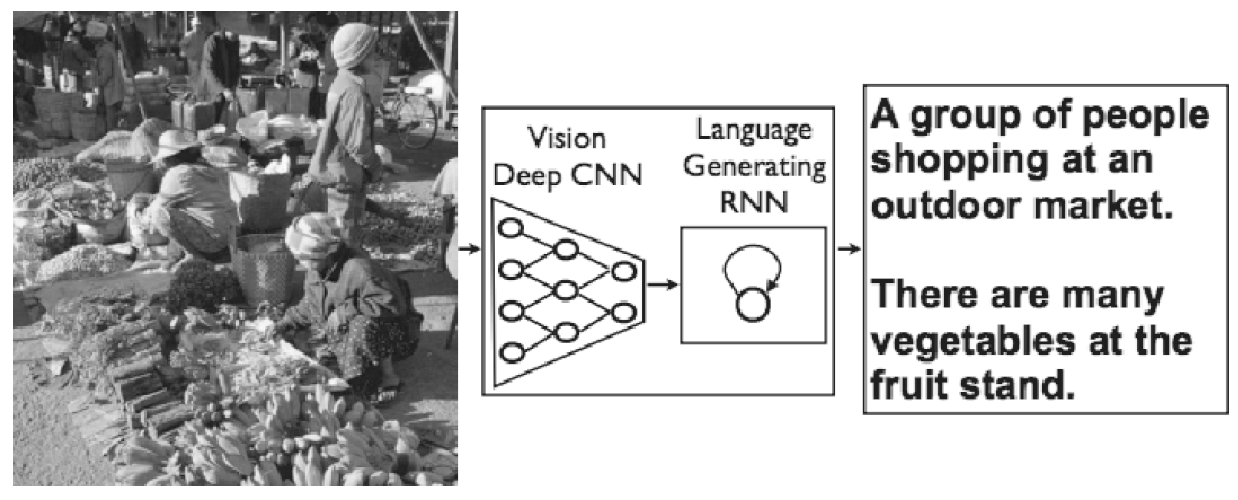

In [7]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_8\\images\\fig 8-22.png")

NIC는 CNN으로 사진에서 특징을 추출하고, 그 특징을 RNN에 넘긴다. RNN은 CNN이 추출한 특징을 초깃값으로 해서 텍스트를 '순환적'으로 생성한다. 여기에서는 더 이상의 상세 기술은 설명하지 않으나, 기본적으로 NIC는 2개의 신경망(CNN과 RNN)을 조합한 간단한 구성이 된다. 그렇기에 놀아울 정도로 정확한 사진 캡션을 만들어내는 것이다. 또한, 사진이나 자연어와 같은 여러 종류의 정보를 조합하고 처리하는 것을 $\small \textbf{멀티모달 처리}^{\text{multimodal processing}}$라고 하며, 최근에 각광받는 분야이기도 하다.     

$\textbf{NOTE}$     
> RNN의 R은 Recurrent(순환적)를 뜻한다. 여기에서 순환은 신경망의 순환적 네트워크 구조를 말한다. 이 순환적인 구조로 인해 이전에 생성한 정보에 영향을 받는 (바꾸어 말하면, 과거의 정보를 기억하는) 점이 RNN의 특징이다. 예를 들어 '나'라는 단어를 생성한 뒤 '잤다'라는 단어를 생성하면 먼저 만든 '나'의 영향을 받아 '는'이라는 조사가 자동으로 생성되어, 최종적으로 '나는 잤다'라는 문장이 완성되는 식이다. 이처럼 자연어와 시계열 데이터 등 연속성 있는 데이터를 다룰 때 RNN은 과거의 정보를 기억하면서 동작하게 된다.

## 8.5 정리
이번 장에서는 (약간) 깊은 CNN을 구현하고, 손글씨 숫자 인식에서 99%를 넘는 높은 정확도를 얻었다. 또, 네트워크를 깊게 하는 동기를 이야기하고 최근의 딥러닝이 더 깊어지는 방향으로 가고 있다는 것도 설명하였다. 그리고 딥러닝의 트렌드와 실제 활용 예, 고속화를 위한 연구등을 소개하였다.      

딥러닝 분야에서는 아직 모르는 것이 많고 새로운 연구가 꼬리를 물고 발표되고 있다. 전세계 연구자와 기술자들은 예전부터 활발하게 연구를 해왔으며 지금 또한 그러하다. 거기에 더해 이제 현실화되가고 있다.

$\textbf{이번 장에서 배운 내용}$
- 수많은 문제에서 신경망을 더 깊게 하여 성능을 개선할 수 있다.
- 이미지 인식 기술 대회인 ILSVRC에서는 딥러닝 기반 기법이 상위권을 독점하였으며, 그 깊이도 더 깊어지는 추세이다.
- 유명한 신경망으로는 VGG, GoogLeNet, ResNet이 있다.
- GPU와 분산 학습, 비트 정밀도 감소 등으로 딥러닝을 고속화할 수 있다.
- 딥러닝(신경망)은 사물 인식뿐 아니라 사물 검출과 분할에도 이용할 수 있다.